# Tabular Playground Series - Oct 2022

- columns & missing entries inspection
- ball min and max coordinates -> field boundaries -> goal coordinates
- selecting a snapshot each 2 seconds (20 frames)
- dropping columns
- filling in missing values
- extracting additional features
- modeling

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv


In [6]:
sample = pd.read_csv("/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv", index_col=0)

In [7]:
sample

,team_A_scoring_within_10sec,team_B_scoring_within_10sec
id,,
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
701138,0,0
701139,0,0
701140,0,0


In [8]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
train0_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_0.csv', dtype=dtypes)

In [9]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test.csv', dtype=dtypes)

## **COLUMNS AND MISSING ENTRIES INSPECTION**

In [10]:
test_df

,id,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,...,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
0,0,-56.270802,29.510000,17.348600,24.499399,-1.311400,11.006801,-35.776199,73.136803,1.2480,...,3.948400,-16.710800,0.0074,71.00000,0.000000,-3.263672,-6.132812,-6.875000,-7.015625,-3.230469
1,1,2.852800,70.195999,8.949000,-8.152200,-65.577202,18.536400,22.926001,87.543800,0.3396,...,-15.496800,-14.876600,0.0050,66.68750,0.000000,-1.615234,-5.968750,-5.503906,0.000000,-6.511719
2,2,52.366402,-98.036797,14.249001,-2.000000,-45.291401,-15.423400,51.288998,-102.055595,6.3570,...,0.905800,-27.413601,0.0042,80.37500,-0.031586,0.000000,0.000000,-3.128906,0.000000,-3.677734
3,3,36.365402,53.961403,23.161798,24.829399,-10.328600,-0.918000,16.424799,0.932800,0.3402,...,-5.053200,-15.106999,0.0052,96.06250,-6.429688,-4.089844,-7.832031,-5.761719,0.000000,-3.923828
4,4,-23.262400,-53.391003,21.209600,-1.667600,-24.778799,3.481200,-19.681801,-93.913605,4.7832,...,22.200001,24.928001,0.0042,0.00000,-9.882812,0.000000,-0.445557,-0.491455,-7.828125,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701138,701138,-4.403200,97.837196,1.947000,-17.187401,5.800400,-0.919400,36.585201,45.022999,1.5646,...,-8.230801,-10.698600,-5.4644,0.39209,0.000000,0.000000,0.000000,-3.521484,0.000000,-7.839844
701139,701139,-74.574600,-62.988998,5.712600,15.206400,-21.422400,0.637800,-81.560600,-48.214001,15.5750,...,-5.291400,-15.463000,6.6894,0.00000,-4.269531,0.000000,-7.964844,0.000000,0.000000,0.000000
701140,701140,-42.743397,-52.765602,4.220400,8.849800,32.853401,17.899399,10.959001,-39.320602,1.9344,...,16.518801,-31.844599,0.0046,100.00000,0.000000,-7.625000,-9.929688,0.000000,0.000000,0.000000
701141,701141,18.133001,-98.273796,32.703400,-5.788400,-60.722599,-5.504600,30.581999,13.514000,0.3402,...,7.217400,-26.050600,0.0054,91.75000,0.000000,-0.161743,0.000000,-2.152344,-0.377197,-2.003906


In [11]:
test_df.columns

Index(['id', 'ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x',
       'ball_vel_y', 'ball_vel_z', 'p0_pos_x', 'p0_pos_y', 'p0_pos_z',
       'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost', 'p1_pos_x', 'p1_pos_y',
       'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z', 'p1_boost', 'p2_pos_x',
       'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y', 'p2_vel_z', 'p2_boost',
       'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x', 'p3_vel_y', 'p3_vel_z',
       'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z', 'p4_vel_x', 'p4_vel_y',
       'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y', 'p5_pos_z', 'p5_vel_x',
       'p5_vel_y', 'p5_vel_z', 'p5_boost', 'boost0_timer', 'boost1_timer',
       'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer'],
      dtype='object')

In [12]:
train0_df.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

In [13]:
set(train0_df.columns)-set(test_df.columns)

{'event_id',
 'event_time',
 'game_num',
 'player_scoring_next',
 'team_A_scoring_within_10sec',
 'team_B_scoring_within_10sec',
 'team_scoring_next'}

In [14]:
test_df.isna().sum()

id                 0
ball_pos_x         0
ball_pos_y         0
ball_pos_z         0
ball_vel_x         0
ball_vel_y         0
ball_vel_z         0
p0_pos_x        6300
p0_pos_y        6300
p0_pos_z        6300
p0_vel_x        6300
p0_vel_y        6300
p0_vel_z        6300
p0_boost        6300
p1_pos_x        6178
p1_pos_y        6178
p1_pos_z        6178
p1_vel_x        6178
p1_vel_y        6178
p1_vel_z        6178
p1_boost        6178
p2_pos_x        6167
p2_pos_y        6167
p2_pos_z        6167
p2_vel_x        6167
p2_vel_y        6167
p2_vel_z        6167
p2_boost        6167
p3_pos_x        6219
p3_pos_y        6219
p3_pos_z        6219
p3_vel_x        6219
p3_vel_y        6219
p3_vel_z        6219
p3_boost        6219
p4_pos_x        6280
p4_pos_y        6280
p4_pos_z        6280
p4_vel_x        6280
p4_vel_y        6280
p4_vel_z        6280
p4_boost        6280
p5_pos_x        6202
p5_pos_y        6202
p5_pos_z        6202
p5_vel_x        6202
p5_vel_y        6202
p5_vel_z     

## **ball min and max coordinates -> field boundaries -> goal coordinates**


In [15]:
print(train0_df["ball_pos_x"].min())
print(train0_df["ball_pos_x"].max())
print(train0_df["ball_pos_y"].min())
print(train0_df["ball_pos_y"].max())
print(train0_df["ball_pos_z"].min())
print(train0_df["ball_pos_z"].max())

-80.792
80.691605
-104.3092
104.3092
1.296
39.4372


In [16]:
goal1_x = 0
goal1_y = -104
goal1_z = 1.3

goal2_x = 0
goal2_y = 104
goal2_z = 1.3

## **selecting a snapshot each 2 seconds (20 frames)**

In [17]:
df = train0_df.iloc[::20, :]

In [18]:
df.head(10)

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.000000,0.000000,1.854800,-0.000000,0.000000,0.0000,41.804798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3,B,0,0
20,1,1002,-31.138983,-28.183201,2.343400,7.293200,-54.728600,2.373000,6.6692,58.555000,...,0.000000,-9.257812,0.000000,0.000000,-9.296875,0.0,3,B,0,0
40,1,1002,-28.947184,-74.141205,27.931398,5.565600,21.986399,25.318798,2.6398,-3.882200,...,0.000000,-7.066406,-9.484375,0.000000,-7.105469,0.0,3,B,0,0
60,1,1002,-26.733187,-58.518997,12.196200,21.335199,-10.988600,-48.323399,13.0762,-50.898399,...,0.000000,-4.847656,-7.269531,-8.914062,-4.882812,0.0,3,B,0,0
80,1,1002,-24.493418,-78.103798,-60.964401,28.814199,-1.705800,18.984800,6.6412,-69.948997,...,0.000000,-2.617188,-5.035156,-6.683594,-2.652344,0.0,3,B,0,0
100,1,1002,-22.282188,-79.065804,-20.800400,12.492400,0.929600,17.249001,-20.9030,-32.526001,...,0.000000,-0.400879,-2.820312,-4.464844,-0.436279,0.0,3,B,0,0
120,1,1002,-20.095720,-75.377403,-10.611600,9.613000,-12.224400,50.556000,13.7790,-43.445602,...,0.000000,0.000000,-0.635254,-2.281250,0.000000,0.0,3,B,0,0
140,1,1002,-17.930658,-67.711800,83.419403,5.654200,6.857200,41.158600,-15.8688,-72.717201,...,-8.226562,0.000000,0.000000,-0.119141,0.000000,0.0,3,B,0,0
160,1,1002,-15.751487,-23.853601,94.380997,7.330000,26.905201,-2.292200,4.3678,-66.093796,...,-6.042969,0.000000,-8.039062,0.000000,0.000000,0.0,3,B,0,0
180,1,1002,-13.478946,15.101400,13.521601,9.241000,15.311999,-38.199799,-12.4828,-4.009200,...,-3.771484,0.000000,-5.765625,0.000000,-7.945312,0.0,3,B,0,0


In [19]:
len(df)

107470

## **dropping columns**

In [20]:
df = df.drop(['team_scoring_next', 'game_num', 'event_id', 'event_time', 'boost0_timer', 'boost1_timer', 
        'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer', 'player_scoring_next'], axis = 1)

## **filling in missing values**

In [21]:
df.isna().sum()

ball_pos_x                        0
ball_pos_y                        0
ball_pos_z                        0
ball_vel_x                        0
ball_vel_y                        0
ball_vel_z                        0
p0_pos_x                        962
p0_pos_y                        962
p0_pos_z                        962
p0_vel_x                        962
p0_vel_y                        962
p0_vel_z                        962
p0_boost                        962
p1_pos_x                        929
p1_pos_y                        929
p1_pos_z                        929
p1_vel_x                        929
p1_vel_y                        929
p1_vel_z                        929
p1_boost                        929
p2_pos_x                        970
p2_pos_y                        970
p2_pos_z                        970
p2_vel_x                        970
p2_vel_y                        970
p2_vel_z                        970
p2_boost                        970
p3_pos_x                    

In [22]:
df['p0_pos_x'].fillna(goal1_x, inplace=True)
df['p1_pos_x'].fillna(goal1_x, inplace=True)
df['p2_pos_x'].fillna(goal1_x, inplace=True)
df['p3_pos_x'].fillna(goal2_x, inplace=True)
df['p4_pos_x'].fillna(goal2_x, inplace=True)
df['p5_pos_x'].fillna(goal2_x, inplace=True)

df['p0_pos_y'].fillna(goal1_y, inplace=True)
df['p1_pos_y'].fillna(goal1_y, inplace=True)
df['p2_pos_y'].fillna(goal1_y, inplace=True)
df['p3_pos_y'].fillna(goal2_y, inplace=True)
df['p4_pos_y'].fillna(goal2_y, inplace=True)
df['p5_pos_y'].fillna(goal2_y, inplace=True)

df['p0_pos_z'].fillna(goal1_z, inplace=True)
df['p1_pos_z'].fillna(goal1_z, inplace=True)
df['p2_pos_z'].fillna(goal1_z, inplace=True)
df['p3_pos_z'].fillna(goal2_z, inplace=True)
df['p4_pos_z'].fillna(goal2_z, inplace=True)
df['p5_pos_z'].fillna(goal2_z, inplace=True)

df.fillna(0, inplace=True)

In [23]:
df.isna().sum()

ball_pos_x                     0
ball_pos_y                     0
ball_pos_z                     0
ball_vel_x                     0
ball_vel_y                     0
ball_vel_z                     0
p0_pos_x                       0
p0_pos_y                       0
p0_pos_z                       0
p0_vel_x                       0
p0_vel_y                       0
p0_vel_z                       0
p0_boost                       0
p1_pos_x                       0
p1_pos_y                       0
p1_pos_z                       0
p1_vel_x                       0
p1_vel_y                       0
p1_vel_z                       0
p1_boost                       0
p2_pos_x                       0
p2_pos_y                       0
p2_pos_z                       0
p2_vel_x                       0
p2_vel_y                       0
p2_vel_z                       0
p2_boost                       0
p3_pos_x                       0
p3_pos_y                       0
p3_pos_z                       0
p3_vel_x  

## **extracting additional features**
- distance from the ball to each of the goals
- distance from the ball to each of the players

In [24]:
df["ball_post_x1"] = abs(df["ball_pos_x"]-goal1_x)
df["ball_post_x2"] = abs(df["ball_pos_x"]-goal2_x)
df["ball_post_y1"] = abs(df["ball_pos_y"]-goal1_y)
df["ball_post_y2"] = abs(df["ball_pos_y"]-goal2_y)
df["ball_post_z1"] = abs(df["ball_pos_z"]-goal1_z)
df["ball_post_z2"] = abs(df["ball_pos_z"]-goal2_z)

In [25]:
df["ball_p0_x"] = abs(df["ball_pos_x"]-df["p0_pos_x"])
df["ball_p0_y"] = abs(df["ball_pos_y"]-df["p0_pos_y"])
df["ball_p0_z"] = abs(df["ball_pos_z"]-df["p0_pos_z"])

df["ball_p1_x"] = abs(df["ball_pos_x"]-df["p1_pos_x"])
df["ball_p1_y"] = abs(df["ball_pos_y"]-df["p1_pos_y"])
df["ball_p1_z"] = abs(df["ball_pos_z"]-df["p1_pos_z"])

df["ball_p2_x"] = abs(df["ball_pos_x"]-df["p2_pos_x"])
df["ball_p2_y"] = abs(df["ball_pos_y"]-df["p2_pos_y"])
df["ball_p2_z"] = abs(df["ball_pos_z"]-df["p2_pos_z"])

df["ball_p3_x"] = abs(df["ball_pos_x"]-df["p3_pos_x"])
df["ball_p3_y"] = abs(df["ball_pos_y"]-df["p3_pos_y"])
df["ball_p3_z"] = abs(df["ball_pos_z"]-df["p3_pos_z"])

df["ball_p4_x"] = abs(df["ball_pos_x"]-df["p4_pos_x"])
df["ball_p4_y"] = abs(df["ball_pos_y"]-df["p4_pos_y"])
df["ball_p4_z"] = abs(df["ball_pos_z"]-df["p4_pos_z"])

df["ball_p5_x"] = abs(df["ball_pos_x"]-df["p5_pos_x"])
df["ball_p5_y"] = abs(df["ball_pos_y"]-df["p5_pos_y"])
df["ball_p5_z"] = abs(df["ball_pos_z"]-df["p5_pos_z"])

## **Repeat the processing for the test data**

In [26]:
test = test_df

In [27]:
test = test.drop(['id', 'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer', 'boost4_timer',
                  'boost5_timer'], axis = 1)

In [28]:
test['p0_pos_x'].fillna(goal1_x, inplace=True)
test['p1_pos_x'].fillna(goal1_x, inplace=True)
test['p2_pos_x'].fillna(goal1_x, inplace=True)
test['p3_pos_x'].fillna(goal2_x, inplace=True)
test['p4_pos_x'].fillna(goal2_x, inplace=True)
test['p5_pos_x'].fillna(goal2_x, inplace=True)

test['p0_pos_y'].fillna(goal1_y, inplace=True)
test['p1_pos_y'].fillna(goal1_y, inplace=True)
test['p2_pos_y'].fillna(goal1_y, inplace=True)
test['p3_pos_y'].fillna(goal2_y, inplace=True)
test['p4_pos_y'].fillna(goal2_y, inplace=True)
test['p5_pos_y'].fillna(goal2_y, inplace=True)

test['p0_pos_z'].fillna(goal1_z, inplace=True)
test['p1_pos_z'].fillna(goal1_z, inplace=True)
test['p2_pos_z'].fillna(goal1_z, inplace=True)
test['p3_pos_z'].fillna(goal2_z, inplace=True)
test['p4_pos_z'].fillna(goal2_z, inplace=True)
test['p5_pos_z'].fillna(goal2_z, inplace=True)

test.fillna(0, inplace=True)

In [29]:
test["ball_post_x1"] = abs(test["ball_pos_x"]-goal1_x)
test["ball_post_x2"] = abs(test["ball_pos_x"]-goal2_x)
test["ball_post_y1"] = abs(test["ball_pos_y"]-goal1_y)
test["ball_post_y2"] = abs(test["ball_pos_y"]-goal2_y)
test["ball_post_z1"] = abs(test["ball_pos_z"]-goal1_z)
test["ball_post_z2"] = abs(test["ball_pos_z"]-goal2_z)

In [30]:
test["ball_p0_x"] = abs(test["ball_pos_x"]-test["p0_pos_x"])
test["ball_p0_y"] = abs(test["ball_pos_y"]-test["p0_pos_y"])
test["ball_p0_z"] = abs(test["ball_pos_z"]-test["p0_pos_z"])

test["ball_p1_x"] = abs(test["ball_pos_x"]-test["p1_pos_x"])
test["ball_p1_y"] = abs(test["ball_pos_y"]-test["p1_pos_y"])
test["ball_p1_z"] = abs(test["ball_pos_z"]-test["p1_pos_z"])

test["ball_p2_x"] = abs(test["ball_pos_x"]-test["p2_pos_x"])
test["ball_p2_y"] = abs(test["ball_pos_y"]-test["p2_pos_y"])
test["ball_p2_z"] = abs(test["ball_pos_z"]-test["p2_pos_z"])

test["ball_p3_x"] = abs(test["ball_pos_x"]-test["p3_pos_x"])
test["ball_p3_y"] = abs(test["ball_pos_y"]-test["p3_pos_y"])
test["ball_p3_z"] = abs(test["ball_pos_z"]-test["p3_pos_z"])

test["ball_p4_x"] = abs(test["ball_pos_x"]-test["p4_pos_x"])
test["ball_p4_y"] = abs(test["ball_pos_y"]-test["p4_pos_y"])
test["ball_p4_z"] = abs(test["ball_pos_z"]-test["p4_pos_z"])

test["ball_p5_x"] = abs(test["ball_pos_x"]-test["p5_pos_x"])
test["ball_p5_y"] = abs(test["ball_pos_y"]-test["p5_pos_y"])
test["ball_p5_z"] = abs(test["ball_pos_z"]-test["p5_pos_z"])

In [31]:
test

,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,...,ball_p2_z,ball_p3_x,ball_p3_y,ball_p3_z,ball_p4_x,ball_p4_y,ball_p4_z,ball_p5_x,ball_p5_y,ball_p5_z
0,-56.270802,29.510000,17.348600,24.499399,-1.311400,11.006801,-35.776199,73.136803,1.2480,18.386999,...,17.008400,52.835602,64.465401,17.008400,32.880402,72.205597,11.624001,5.215202,25.084200,17.008600
1,2.852800,70.195999,8.949000,-8.152200,-65.577202,18.536400,22.926001,87.543800,0.3396,-41.954800,...,8.608800,2.852800,33.804001,7.649000,9.398800,16.771805,7.410800,36.273800,22.619003,8.608800
2,52.366402,-98.036797,14.249001,-2.000000,-45.291401,-15.423400,51.288998,-102.055595,6.3570,8.638000,...,13.895000,12.099403,62.164799,13.908800,1.086601,4.236992,1.377800,35.423801,136.748795,13.908800
3,36.365402,53.961403,23.161798,24.829399,-10.328600,-0.918000,16.424799,0.932800,0.3402,39.627602,...,19.859398,81.654404,29.146400,22.821798,25.352602,0.792404,5.058199,19.194603,39.203003,22.821598
4,-23.262400,-53.391003,21.209600,-1.667600,-24.778799,3.481200,-19.681801,-93.913605,4.7832,-4.137600,...,20.869801,7.828402,36.654404,6.717800,13.423201,83.290405,20.836401,87.058998,38.016800,20.869400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701138,-4.403200,97.837196,1.947000,-17.187401,5.800400,-0.919400,36.585201,45.022999,1.5646,-40.118401,...,1.557800,5.828800,2.775208,1.610000,72.406998,9.339195,1.224600,14.011200,11.137001,1.184600
701139,-74.574600,-62.988998,5.712600,15.206400,-21.422400,0.637800,-81.560600,-48.214001,15.5750,0.212000,...,5.372400,118.845200,40.180397,5.387800,30.665199,123.356995,5.372200,5.966400,8.533997,3.488800
701140,-42.743397,-52.765602,4.220400,8.849800,32.853401,17.899399,10.959001,-39.320602,1.9344,35.953201,...,3.883200,18.037403,34.181595,4.075600,9.137596,33.626205,3.880600,29.776203,56.306004,3.880200
701141,18.133001,-98.273796,32.703400,-5.788400,-60.722599,-5.504600,30.581999,13.514000,0.3402,-19.343800,...,32.363201,37.454201,70.588593,32.363598,2.517599,34.545799,2.181601,38.849400,103.173599,32.362400


In [32]:
set(df.columns)-set(test.columns)

{'team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'}

## **Modeling**
- LightGBM (V1)
- CatBoost (V2)
- Adjust model hyperparameters (V3)
- Train on more data (V4)
- Try different snapshot interval (V5)
- Train on all data (V6)
- LightGBM Classifier (V7)
- Hyperparameter tuning (V8)

</br></br>

### **LightGBM** (V1)

In [33]:
import lightgbm as lgb

In [34]:
model1 = lgb.LGBMRegressor()
model2 = lgb.LGBMRegressor()

In [35]:
target = ['team_A_scoring_within_10sec','team_B_scoring_within_10sec']

In [36]:
%%time

model1.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model2.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

CPU times: user 21.1 s, sys: 23.4 ms, total: 21.1 s
Wall time: 5.55 s


LGBMRegressor()

In [37]:
y_pred1 = model1.predict(test)
y_pred2 = model2.predict(test)

In [38]:
sample['team_A_scoring_within_10sec'] = y_pred1
sample['team_B_scoring_within_10sec'] = y_pred2

In [39]:
sample

,team_A_scoring_within_10sec,team_B_scoring_within_10sec
id,,
0,0.059684,0.025573
1,0.024060,0.127303
2,0.013738,0.088609
3,0.068278,0.036624
4,0.062557,0.081788
...,...,...
701138,0.314977,0.048509
701139,0.017762,0.077139
701140,0.044121,0.044137


In [40]:
sample.to_csv("sub1.csv")

### **CatBoost** (V2)

In [ ]:
import catboost as cb
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import log_loss

In [ ]:
model1_ = CatBoostRegressor(verbose=0)
model2_ = CatBoostRegressor(verbose=0)

In [ ]:
%%time

model1_.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model2_.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

In [ ]:
y_pred1_ = model1_.predict(test)
y_pred2_ = model2_.predict(test)

In [ ]:
sample['team_A_scoring_within_10sec'] = y_pred1_
sample['team_B_scoring_within_10sec'] = y_pred2_

In [ ]:
sample

In [ ]:
sample.to_csv("sub2.csv")

#### Adjusted parameters (V3)

In [ ]:
model3 = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.8, boosting_type="dart")
model4 = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.8, boosting_type="dart")

In [ ]:
%%time

model3.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model4.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

In [ ]:
y_pred3 = model3.predict(test)
y_pred4 = model4.predict(test)

In [ ]:
sample['team_A_scoring_within_10sec'] = y_pred3
sample['team_B_scoring_within_10sec'] = y_pred4

In [ ]:
sample

In [ ]:
sample.to_csv("sub3.csv")

#### Training on more data (V4)

In [41]:
def process_df(dataset_name):
    s = '/kaggle/input/tabular-playground-series-oct-2022/' + dataset_name
    train_df = pd.read_csv(s, dtype=dtypes)
    
    df = train_df.iloc[::20, :]    
    
    df = df.drop(['team_scoring_next', 'game_num', 'event_id', 'event_time', 'boost0_timer', 'boost1_timer', 
        'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer', 'player_scoring_next'], axis = 1)
    
    df['p0_pos_x'].fillna(goal1_x, inplace=True)
    df['p1_pos_x'].fillna(goal1_x, inplace=True)
    df['p2_pos_x'].fillna(goal1_x, inplace=True)
    df['p3_pos_x'].fillna(goal2_x, inplace=True)
    df['p4_pos_x'].fillna(goal2_x, inplace=True)
    df['p5_pos_x'].fillna(goal2_x, inplace=True)

    df['p0_pos_y'].fillna(goal1_y, inplace=True)
    df['p1_pos_y'].fillna(goal1_y, inplace=True)
    df['p2_pos_y'].fillna(goal1_y, inplace=True)
    df['p3_pos_y'].fillna(goal2_y, inplace=True)
    df['p4_pos_y'].fillna(goal2_y, inplace=True)
    df['p5_pos_y'].fillna(goal2_y, inplace=True)

    df['p0_pos_z'].fillna(goal1_z, inplace=True)
    df['p1_pos_z'].fillna(goal1_z, inplace=True)
    df['p2_pos_z'].fillna(goal1_z, inplace=True)
    df['p3_pos_z'].fillna(goal2_z, inplace=True)
    df['p4_pos_z'].fillna(goal2_z, inplace=True)
    df['p5_pos_z'].fillna(goal2_z, inplace=True)

    df.fillna(0, inplace=True)
    
    df["ball_post_x1"] = abs(df["ball_pos_x"]-goal1_x)
    df["ball_post_x2"] = abs(df["ball_pos_x"]-goal2_x)
    df["ball_post_y1"] = abs(df["ball_pos_y"]-goal1_y)
    df["ball_post_y2"] = abs(df["ball_pos_y"]-goal2_y)
    df["ball_post_z1"] = abs(df["ball_pos_z"]-goal1_z)
    df["ball_post_z2"] = abs(df["ball_pos_z"]-goal2_z)

    df["ball_p0_x"] = abs(df["ball_pos_x"]-df["p0_pos_x"])
    df["ball_p0_y"] = abs(df["ball_pos_y"]-df["p0_pos_y"])
    df["ball_p0_z"] = abs(df["ball_pos_z"]-df["p0_pos_z"])

    df["ball_p1_x"] = abs(df["ball_pos_x"]-df["p1_pos_x"])
    df["ball_p1_y"] = abs(df["ball_pos_y"]-df["p1_pos_y"])
    df["ball_p1_z"] = abs(df["ball_pos_z"]-df["p1_pos_z"])

    df["ball_p2_x"] = abs(df["ball_pos_x"]-df["p2_pos_x"])
    df["ball_p2_y"] = abs(df["ball_pos_y"]-df["p2_pos_y"])
    df["ball_p2_z"] = abs(df["ball_pos_z"]-df["p2_pos_z"])

    df["ball_p3_x"] = abs(df["ball_pos_x"]-df["p3_pos_x"])
    df["ball_p3_y"] = abs(df["ball_pos_y"]-df["p3_pos_y"])
    df["ball_p3_z"] = abs(df["ball_pos_z"]-df["p3_pos_z"])

    df["ball_p4_x"] = abs(df["ball_pos_x"]-df["p4_pos_x"])
    df["ball_p4_y"] = abs(df["ball_pos_y"]-df["p4_pos_y"])
    df["ball_p4_z"] = abs(df["ball_pos_z"]-df["p4_pos_z"])

    df["ball_p5_x"] = abs(df["ball_pos_x"]-df["p5_pos_x"])
    df["ball_p5_y"] = abs(df["ball_pos_y"]-df["p5_pos_y"])
    df["ball_p5_z"] = abs(df["ball_pos_z"]-df["p5_pos_z"])
    
    return df

In [ ]:
df0 = process_df("train_0.csv")
df1 = process_df("train_1.csv")
df2 = process_df("train_2.csv")

In [ ]:
df = pd.concat([df0, df1, df2])
df

In [ ]:
model5 = lgb.LGBMRegressor()
model6 = lgb.LGBMRegressor()

In [ ]:
%%time

model5.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model6.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

In [ ]:
y_pred5 = model5.predict(test)
y_pred6 = model6.predict(test)

In [ ]:
sample['team_A_scoring_within_10sec'] = y_pred5
sample['team_B_scoring_within_10sec'] = y_pred6

In [ ]:
sample

In [ ]:
sample.to_csv("sub4.csv")

#### Different frames (one each 40 frames) (V5)

In [ ]:
def process_df(dataset_name):
    s = '/kaggle/input/tabular-playground-series-oct-2022/' + dataset_name
    train_df = pd.read_csv(s, dtype=dtypes)
    
    df = train_df.iloc[::40, :]    
    
    df = df.drop(['team_scoring_next', 'game_num', 'event_id', 'event_time', 'boost0_timer', 'boost1_timer', 
        'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer', 'player_scoring_next'], axis = 1)
    
    df['p0_pos_x'].fillna(goal1_x, inplace=True)
    df['p1_pos_x'].fillna(goal1_x, inplace=True)
    df['p2_pos_x'].fillna(goal1_x, inplace=True)
    df['p3_pos_x'].fillna(goal2_x, inplace=True)
    df['p4_pos_x'].fillna(goal2_x, inplace=True)
    df['p5_pos_x'].fillna(goal2_x, inplace=True)

    df['p0_pos_y'].fillna(goal1_y, inplace=True)
    df['p1_pos_y'].fillna(goal1_y, inplace=True)
    df['p2_pos_y'].fillna(goal1_y, inplace=True)
    df['p3_pos_y'].fillna(goal2_y, inplace=True)
    df['p4_pos_y'].fillna(goal2_y, inplace=True)
    df['p5_pos_y'].fillna(goal2_y, inplace=True)

    df['p0_pos_z'].fillna(goal1_z, inplace=True)
    df['p1_pos_z'].fillna(goal1_z, inplace=True)
    df['p2_pos_z'].fillna(goal1_z, inplace=True)
    df['p3_pos_z'].fillna(goal2_z, inplace=True)
    df['p4_pos_z'].fillna(goal2_z, inplace=True)
    df['p5_pos_z'].fillna(goal2_z, inplace=True)

    df.fillna(0, inplace=True)
    
    df["ball_post_x1"] = abs(df["ball_pos_x"]-goal1_x)
    df["ball_post_x2"] = abs(df["ball_pos_x"]-goal2_x)
    df["ball_post_y1"] = abs(df["ball_pos_y"]-goal1_y)
    df["ball_post_y2"] = abs(df["ball_pos_y"]-goal2_y)
    df["ball_post_z1"] = abs(df["ball_pos_z"]-goal1_z)
    df["ball_post_z2"] = abs(df["ball_pos_z"]-goal2_z)

    df["ball_p0_x"] = abs(df["ball_pos_x"]-df["p0_pos_x"])
    df["ball_p0_y"] = abs(df["ball_pos_y"]-df["p0_pos_y"])
    df["ball_p0_z"] = abs(df["ball_pos_z"]-df["p0_pos_z"])

    df["ball_p1_x"] = abs(df["ball_pos_x"]-df["p1_pos_x"])
    df["ball_p1_y"] = abs(df["ball_pos_y"]-df["p1_pos_y"])
    df["ball_p1_z"] = abs(df["ball_pos_z"]-df["p1_pos_z"])

    df["ball_p2_x"] = abs(df["ball_pos_x"]-df["p2_pos_x"])
    df["ball_p2_y"] = abs(df["ball_pos_y"]-df["p2_pos_y"])
    df["ball_p2_z"] = abs(df["ball_pos_z"]-df["p2_pos_z"])

    df["ball_p3_x"] = abs(df["ball_pos_x"]-df["p3_pos_x"])
    df["ball_p3_y"] = abs(df["ball_pos_y"]-df["p3_pos_y"])
    df["ball_p3_z"] = abs(df["ball_pos_z"]-df["p3_pos_z"])

    df["ball_p4_x"] = abs(df["ball_pos_x"]-df["p4_pos_x"])
    df["ball_p4_y"] = abs(df["ball_pos_y"]-df["p4_pos_y"])
    df["ball_p4_z"] = abs(df["ball_pos_z"]-df["p4_pos_z"])

    df["ball_p5_x"] = abs(df["ball_pos_x"]-df["p5_pos_x"])
    df["ball_p5_y"] = abs(df["ball_pos_y"]-df["p5_pos_y"])
    df["ball_p5_z"] = abs(df["ball_pos_z"]-df["p5_pos_z"])
    
    return df

In [ ]:
df0 = process_df("train_0.csv")
df1 = process_df("train_1.csv")
df2 = process_df("train_2.csv")

In [ ]:
df = pd.concat([df0, df1, df2])
df

In [ ]:
model7 = lgb.LGBMRegressor()
model8 = lgb.LGBMRegressor()

In [ ]:
%%time

model7.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model8.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

In [ ]:
y_pred7 = model7.predict(test)
y_pred8 = model8.predict(test)

In [ ]:
sample['team_A_scoring_within_10sec'] = y_pred7
sample['team_B_scoring_within_10sec'] = y_pred8

In [ ]:
sample

In [ ]:
sample.to_csv("sub5.csv")

#### Training on all data (V6)

In [42]:
def process_df(dataset_name):
    s = '/kaggle/input/tabular-playground-series-oct-2022/' + dataset_name
    train_df = pd.read_csv(s, dtype=dtypes)
    
    df = train_df.iloc[::20, :]    
    
    df = df.drop(['team_scoring_next', 'game_num', 'event_id', 'event_time', 'boost0_timer', 'boost1_timer', 
        'boost2_timer', 'boost3_timer', 'boost4_timer', 'boost5_timer', 'player_scoring_next'], axis = 1)
    
    df['p0_pos_x'].fillna(goal1_x, inplace=True)
    df['p1_pos_x'].fillna(goal1_x, inplace=True)
    df['p2_pos_x'].fillna(goal1_x, inplace=True)
    df['p3_pos_x'].fillna(goal2_x, inplace=True)
    df['p4_pos_x'].fillna(goal2_x, inplace=True)
    df['p5_pos_x'].fillna(goal2_x, inplace=True)

    df['p0_pos_y'].fillna(goal1_y, inplace=True)
    df['p1_pos_y'].fillna(goal1_y, inplace=True)
    df['p2_pos_y'].fillna(goal1_y, inplace=True)
    df['p3_pos_y'].fillna(goal2_y, inplace=True)
    df['p4_pos_y'].fillna(goal2_y, inplace=True)
    df['p5_pos_y'].fillna(goal2_y, inplace=True)

    df['p0_pos_z'].fillna(goal1_z, inplace=True)
    df['p1_pos_z'].fillna(goal1_z, inplace=True)
    df['p2_pos_z'].fillna(goal1_z, inplace=True)
    df['p3_pos_z'].fillna(goal2_z, inplace=True)
    df['p4_pos_z'].fillna(goal2_z, inplace=True)
    df['p5_pos_z'].fillna(goal2_z, inplace=True)

    df.fillna(0, inplace=True)
    
    df["ball_post_x1"] = abs(df["ball_pos_x"]-goal1_x)
    df["ball_post_x2"] = abs(df["ball_pos_x"]-goal2_x)
    df["ball_post_y1"] = abs(df["ball_pos_y"]-goal1_y)
    df["ball_post_y2"] = abs(df["ball_pos_y"]-goal2_y)
    df["ball_post_z1"] = abs(df["ball_pos_z"]-goal1_z)
    df["ball_post_z2"] = abs(df["ball_pos_z"]-goal2_z)

    df["ball_p0_x"] = abs(df["ball_pos_x"]-df["p0_pos_x"])
    df["ball_p0_y"] = abs(df["ball_pos_y"]-df["p0_pos_y"])
    df["ball_p0_z"] = abs(df["ball_pos_z"]-df["p0_pos_z"])

    df["ball_p1_x"] = abs(df["ball_pos_x"]-df["p1_pos_x"])
    df["ball_p1_y"] = abs(df["ball_pos_y"]-df["p1_pos_y"])
    df["ball_p1_z"] = abs(df["ball_pos_z"]-df["p1_pos_z"])

    df["ball_p2_x"] = abs(df["ball_pos_x"]-df["p2_pos_x"])
    df["ball_p2_y"] = abs(df["ball_pos_y"]-df["p2_pos_y"])
    df["ball_p2_z"] = abs(df["ball_pos_z"]-df["p2_pos_z"])

    df["ball_p3_x"] = abs(df["ball_pos_x"]-df["p3_pos_x"])
    df["ball_p3_y"] = abs(df["ball_pos_y"]-df["p3_pos_y"])
    df["ball_p3_z"] = abs(df["ball_pos_z"]-df["p3_pos_z"])

    df["ball_p4_x"] = abs(df["ball_pos_x"]-df["p4_pos_x"])
    df["ball_p4_y"] = abs(df["ball_pos_y"]-df["p4_pos_y"])
    df["ball_p4_z"] = abs(df["ball_pos_z"]-df["p4_pos_z"])

    df["ball_p5_x"] = abs(df["ball_pos_x"]-df["p5_pos_x"])
    df["ball_p5_y"] = abs(df["ball_pos_y"]-df["p5_pos_y"])
    df["ball_p5_z"] = abs(df["ball_pos_z"]-df["p5_pos_z"])
    
    return df

In [43]:
df0 = process_df("train_0.csv")
df1 = process_df("train_1.csv")
df2 = process_df("train_2.csv")
df3 = process_df("train_3.csv")
df4 = process_df("train_4.csv")
df5 = process_df("train_5.csv")
df6 = process_df("train_6.csv")
df7 = process_df("train_7.csv")
df8 = process_df("train_8.csv")
df9 = process_df("train_9.csv")

In [44]:
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])
df

,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,...,ball_p2_z,ball_p3_x,ball_p3_y,ball_p3_z,ball_p4_x,ball_p4_y,ball_p4_z,ball_p5_x,ball_p5_y,ball_p5_z
0,-0.000000,0.000000,1.854800,-0.000000,0.000000,0.000000,41.804798,-51.924999,0.340200,5.635400,...,1.514600,5.060400,75.532005,1.514600,41.766403,52.006401,1.513800,39.757401,49.821602,1.514600
20,-28.183201,2.343400,7.293200,-54.728600,2.373000,6.669200,58.555000,-82.349403,0.340200,-8.369000,...,5.388800,26.117802,13.881600,6.953000,23.801800,81.347595,6.952000,15.122801,2.585400,5.302600
40,-74.141205,27.931398,5.565600,21.986399,25.318798,2.639800,-3.882200,-79.135201,0.340200,-26.825001,...,4.568000,42.979607,10.733603,3.737400,45.246002,40.839203,5.224400,2.070999,28.613398,2.681000
60,-58.518997,12.196200,21.335199,-10.988600,-48.323399,13.076200,-50.898399,-53.602596,0.340200,-23.162600,...,19.753599,44.070396,74.784607,20.994999,58.518997,91.803802,20.035200,19.056000,8.607400,19.289799
80,-78.103798,-60.964401,28.814199,-1.705800,18.984800,6.641200,-69.948997,-76.252205,24.424999,16.338600,...,28.474400,43.959000,72.815804,28.473999,78.103798,164.964401,27.514200,30.331200,117.421600,28.473999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102720,39.800800,-3.488800,17.262400,35.195999,-12.099800,-9.905800,30.032200,-14.600000,0.340000,21.248999,...,16.941200,109.313599,61.853199,16.926199,26.614799,12.206800,15.716800,89.836800,1.853400,8.415200
2102740,68.340401,-22.058800,12.025600,-12.983001,-5.743600,2.275200,21.836399,-48.208199,0.340000,-20.873999,...,9.879001,91.667000,93.921204,11.685400,13.239197,4.890800,1.755200,134.979004,28.326401,11.685201
2102760,7.367800,-20.693798,2.387800,-51.159199,9.424200,-8.503600,7.680800,-72.402000,0.340000,-13.612400,...,2.047600,0.682000,52.748997,2.047600,12.011600,2.448597,1.115400,15.768801,6.999598,1.897800
2102780,-34.138000,-95.679802,9.955200,-42.433197,-9.577400,1.069400,-18.024200,-97.705803,5.001400,-29.150801,...,8.655200,4.874800,97.353600,9.615000,39.064201,97.455605,9.615000,69.536400,51.806805,9.615000


In [45]:
model9 = lgb.LGBMRegressor()
model10 = lgb.LGBMRegressor()

In [46]:
%%time

model9.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model10.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

CPU times: user 3min 34s, sys: 411 ms, total: 3min 35s
Wall time: 55.5 s


LGBMRegressor()

In [47]:
y_pred9 = model9.predict(test)
y_pred10 = model10.predict(test)

In [48]:
sample['team_A_scoring_within_10sec'] = y_pred9
sample['team_B_scoring_within_10sec'] = y_pred10

In [49]:
sample

,team_A_scoring_within_10sec,team_B_scoring_within_10sec
id,,
0,0.018016,0.028568
1,0.022552,0.114224
2,0.012596,0.122964
3,0.063070,0.037781
4,0.023625,0.070757
...,...,...
701138,0.341271,0.032580
701139,0.018852,0.072002
701140,0.059533,0.048382


In [50]:
sample.to_csv("sub6.csv")

### LGBM Classifier (V7)

In [ ]:
model11 = lgb.LGBMClassifier()
model12 = lgb.LGBMClassifier()

In [ ]:
%%time

model11.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])
model12.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

In [ ]:
y_pred11 = model11.predict_proba(test)
y_pred12 = model12.predict_proba(test)

In [ ]:
sample['team_A_scoring_within_10sec'] = y_pred11
sample['team_B_scoring_within_10sec'] = y_pred12

In [ ]:
sample

In [ ]:
sample.to_csv("sub7.csv")

### Hyperparameter tuning (V8)

In [51]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [52]:
X = df.drop(target, axis=1)
y = df[['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
y_train_A = y_train['team_A_scoring_within_10sec']
y_train_B = y_train['team_B_scoring_within_10sec']

y_test_A = y_test['team_A_scoring_within_10sec']
y_test_B = y_test['team_B_scoring_within_10sec']

In [69]:
lgb_1= lgb.LGBMRegressor()
lgb_2= lgb.LGBMRegressor()

grid_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [80, 100, 120],
    'boosting_type': ['gbdt', "goss"], 
    'random_state': [42],
    'verbose': [-1]
}

clf_1= GridSearchCV(lgb_1, grid_params, cv=5)
clf_2= GridSearchCV(lgb_2, grid_params, cv=5)

In [70]:
%%time 
clf_1.fit(X_train, y_train_A)
print(clf_1.best_params_)

{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 120, 'random_state': 42, 'verbose': -1}
CPU times: user 1h 10min 52s, sys: 9.51 s, total: 1h 11min 1s
Wall time: 18min 43s


In [71]:
%%time 
clf_2.fit(X_train, y_train_B)
print(clf_2.best_params_)

{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 120, 'random_state': 42, 'verbose': -1}
CPU times: user 1h 8min 41s, sys: 9.87 s, total: 1h 8min 51s
Wall time: 18min 2s


**clf_1.best_params_** = {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 120, 'random_state': 42, 'verbose': -1}

**clf_2.best_params_** = {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 120, 'random_state': 42, 'verbose': -1}

In [72]:
%%time
model13 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate= 0.1, n_estimators= 120, 
                            random_state= 42, verbose= -1)
model13.fit(X_train, y_train_A)

CPU times: user 1min 38s, sys: 122 ms, total: 1min 38s
Wall time: 25.3 s


LGBMRegressor(n_estimators=120, random_state=42, verbose=-1)

In [73]:
%%time
model14 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate= 0.1, n_estimators= 120, 
                            random_state= 42, verbose= -1)
model14.fit(X_train, y_train_B)

CPU times: user 1min 36s, sys: 132 ms, total: 1min 36s
Wall time: 24.9 s


LGBMRegressor(n_estimators=120, random_state=42, verbose=-1)

In [74]:
y_pred13 = model13.predict(X_test)
y_pred13

array([0.02198749, 0.02105774, 0.10030303, ..., 0.08412759, 0.04257368,
       0.03168927])

In [75]:
y_pred14 = model14.predict(X_test)
y_pred14

array([0.09026561, 0.04551753, 0.01854521, ..., 0.04299112, 0.03213861,
       0.05875256])

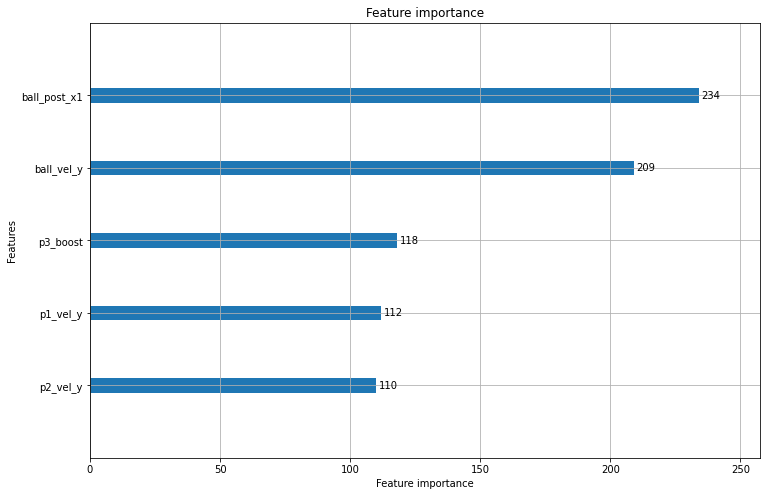

In [76]:
lgb.plot_importance(model13, importance_type='split', max_num_features=5, figsize=(12, 8));

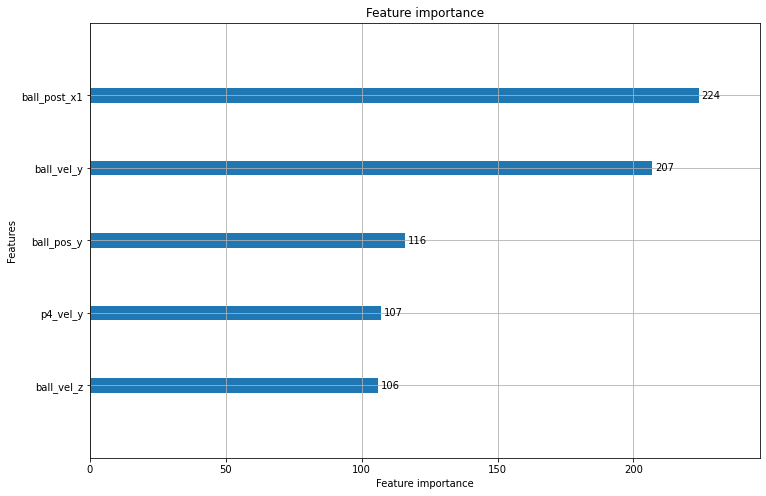

In [77]:
lgb.plot_importance(model14, importance_type='split', max_num_features=5, figsize=(12, 8));

In [80]:
from sklearn.metrics import log_loss

In [81]:
(log_loss(y_test_A, y_pred13) + log_loss(y_test_B, y_pred14))/2

0.19455280776537198

In [82]:
%%time
model15 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate= 0.1, n_estimators= 120, 
                            random_state= 42, verbose= -1)
model15.fit(df.drop(target, axis=1), df['team_A_scoring_within_10sec'])

CPU times: user 2min 13s, sys: 488 ms, total: 2min 14s
Wall time: 36.6 s


LGBMRegressor(n_estimators=120, random_state=42, verbose=-1)

In [83]:
%%time
model16 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate= 0.1, n_estimators= 120, 
                            random_state= 42, verbose= -1)
model16.fit(df.drop(target, axis=1), df['team_B_scoring_within_10sec'])

CPU times: user 2min 2s, sys: 149 ms, total: 2min 2s
Wall time: 31.4 s


LGBMRegressor(n_estimators=120, random_state=42, verbose=-1)

In [84]:
y_pred15 = model15.predict(test)
y_pred16 = model16.predict(test)

In [85]:
sample['team_A_scoring_within_10sec'] = y_pred15
sample['team_B_scoring_within_10sec'] = y_pred16

In [86]:
sample

,team_A_scoring_within_10sec,team_B_scoring_within_10sec
id,,
0,0.016835,0.031966
1,0.026936,0.145172
2,0.013395,0.136745
3,0.062438,0.037787
4,0.027477,0.069374
...,...,...
701138,0.343604,0.032934
701139,0.017037,0.062753
701140,0.061129,0.047960


In [87]:
sample.to_csv("sub8.csv")